# Task 1

## Part 1

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Download necessary NLTK packages
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load the IMDB Movie Review dataset
try:
    df = pd.read_csv('IMDB Dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The dataset file 'IMDB Dataset.csv' was not found. Please check the file path.")
    exit()

# Check the first few rows of the dataset to ensure it's loaded correctly
print(df.head())  # This will help us check the column names and the structure

# Check for missing values in 'review' and 'sentiment' columns
print("Missing values in the dataset:")
print(df[['review', 'sentiment']].isnull().sum())

# Drop rows with missing values in the 'review' or 'sentiment' columns
df = df.dropna(subset=['review', 'sentiment'])

# Preprocessing function
def preprocess_reviews(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove non-alphabetic characters
    review = re.sub(r'[^a-z\s]', '', review)
    
    # Tokenize the review
    words = review.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    
    return ' '.join(words)

# Apply preprocessing to each review
df['processed_review'] = df['review'].apply(preprocess_reviews)

# Convert sentiment to binary (0 for negative, 1 for positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Check the column names and processed data
print("Processed data sample:")
print(df[['processed_review', 'sentiment']].head())

# Split the dataset into training and testing sets (80% training, 20% testing)
X = df['processed_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Bag-of-Words model using CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Check the shape of the Bag-of-Words matrix
print("Shape of the Bag-of-Words matrix for training data:", X_train_bow.shape)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

# Model is now trained and ready to be used.
print("Naive Bayes classifier trained successfully.")

# Now you can use the model for predictions or evaluations


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset loaded successfully.
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Missing values in the dataset:
review       0
sentiment    0
dtype: int64


# Part 2: Model Evaluation

Accuracy:  0.8555
Precision:  0.8691454396055875
Recall:  0.8396507243500695
F1-Score:  0.8541435348743313
Confusion Matrix:
 [[4324  637]
 [ 808 4231]]
ROC-AUC Score:  0.9224501018641973


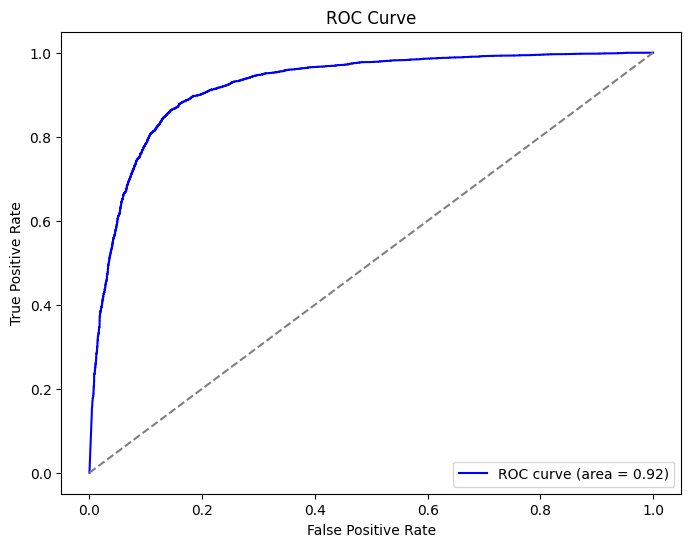

In [32]:
# Importing evaluation libraries
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Make predictions
y_pred = nb_classifier.predict(X_test_bow)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test_bow)[:, 1])

# Print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC Score: ", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_classifier.predict_proba(X_test_bow)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Task2

## Import necessary libraries


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

## Data Loading and Preprocessing

In [17]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform exploratory data analysis
print("Dataset Statistics:\n", pd.DataFrame(X, columns=feature_names).describe())
print("Missing Values:\n", pd.DataFrame(X, columns=feature_names).isnull().sum())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset Statistics:
         mean radius  mean texture  mean perimeter     mean area  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -3.153111e-15 -6.568462e-15   -6.993039e-16 -8.553985e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.081447e-15     -1.136369e-15   -2.997017e-16         1.023981e-15   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.11487

## Apply a Wrapper Method

In [18]:
# Apply Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=500, solver='liblinear')
rfe = RFE(model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print selected features
selected_features = feature_names[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: ['radius error' 'worst radius' 'worst texture' 'worst area'
 'worst concave points']


## Model Evaluation

In [21]:
# Train and evaluate the model
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.969701932525385


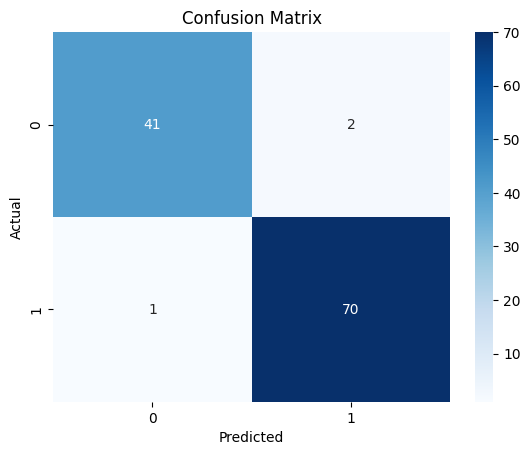

In [22]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
